create tables of how your current delegation has grown over time.

+-------------+--------------------------------------------------+---------+
| date        | hotkey                                           |   alpha |
|-------------+--------------------------------------------------+---------|
| 02/21 07:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1    |
| 02/21 08:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1027 |
| 02/21 10:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1054 |
| 02/21 11:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1082 |
| 02/21 12:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1109 |
| 02/21 13:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1136 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63      |
| 02/21 14:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63      |
| 02/21 16:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0027 |

in cell 1 add your taostats [API key](https://dash.taostats.io) and your coldkey

cell 2 - timestamp standarization
cell 3 - gets your current stakes
cell 4 gets the history of your current stakes
cell 5 - chart
cell 6 tables.

In [1]:
import requests, json
import pandas as pd
import numpy as np
import decimal
import time
from datetime import datetime, timedelta
from rich import print


api_key=""
headers = {
    "accept": "application/json",
    "Authorization": api_key
}

coldkey =""
  



headers = {
            "accept": "application/json",
            "Authorization": api_key
        }



In [2]:
#sometimes the chain spits out a time with milliseconds.. Sometimess it doesnt.  Its annoying.
#this fixes it. returns a datetime object
def stupid_time_fix(timestamp):
    if len(timestamp) > 20:
        date_obj = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%S.%fZ")
    else:
        date_obj = datetime.strptime(timestamp, "%Y-%m-%dT%H:%M:%SZ")
    
    return date_obj

In [3]:
balances = []
valis = []



url = f"https://api.taostats.io/api/dtao/stake_balance/latest/v1?coldkey={coldkey}"
response = requests.get(url, headers=headers)
resJson = json.loads(response.text)
for stake in resJson['data']:
    hotkey = stake['hotkey']['ss58']
    time = stupid_time_fix(stake['timestamp'])
    netuid = stake['netuid']
    alpha = float(stake['balance'])/1e9
    balances.append({"netuid":netuid,"vali": hotkey,"time":time, "alpha": alpha}) 
    valis.append(hotkey)

#print(balances)


In [4]:
balance_history = []
for balance in balances:
    netuid = balance['netuid']
    vali = balance['vali']
    print(netuid, vali)
    
    url = f"https://api.taostats.io/api/dtao/stake_balance/history/v1?coldkey={coldkey}&hotkey={vali}&netuid={netuid}"
    response = requests.get(url, headers=headers)
    resJson = json.loads(response.text)
    validata = resJson['data']
    for vali in validata:
        if vali['block_number'] >4973713:
                hotkey = vali['hotkey']['ss58']
                time = stupid_time_fix(vali['timestamp'])
                netuid = vali['netuid']
                alpha = float(vali['balance'])/1e9
                balance_history.append({"netuid":netuid,"vali": hotkey,"time":time, "alpha": alpha}) 

balances += balance_history

0 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

13 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

19 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

25 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

41 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

56 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

64 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1

In [5]:
print(len(balances))

642

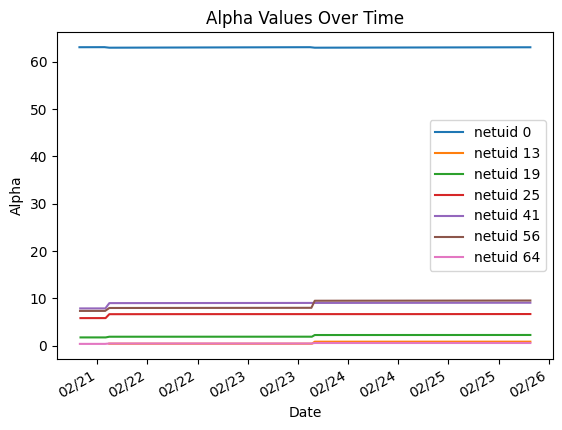

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime



# Create a dictionary to group data by netuid
data_by_netuid = {}
for balance in balances:
    netuid = balance['netuid']
    if netuid not in data_by_netuid:
        data_by_netuid[netuid] = {'dates': [], 'alpha': []}
    data_by_netuid[netuid]['dates'].append(balance['time'])
    data_by_netuid[netuid]['alpha'].append(balance['alpha'])

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data for each netuid
for netuid, data in data_by_netuid.items():
    ax.plot(data['dates'], data['alpha'], label=f'netuid {netuid}')

# Format x-axis to display dates
date_formatter = mdates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_formatter)
fig.autofmt_xdate()

# Add title and labels
ax.set_title('Alpha Values Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Alpha')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [7]:
from tabulate import tabulate
from datetime import datetime


# Create a dictionary to group data by netuid
data_by_netuid = {}
for balance in balances:
    netuid = balance['netuid']
    if netuid not in data_by_netuid:
        data_by_netuid[netuid] = []
    data_by_netuid[netuid].append({
        'date': balance['time'].strftime('%m/%d %H:%M'),
        'hotkey': balance['vali'],
        'alpha': balance['alpha']
    })

# Print table for each netuid
for netuid, data in data_by_netuid.items():
    # Sort data by date
    data.sort(key=lambda x: datetime.strptime(x['date'], '%m/%d %H:%M'))
    
    # Print table
    print(f"netuid {netuid}:")
    print(tabulate(data, headers='keys', tablefmt='psql'))
    print()

netuid 0:

+-------------+--------------------------------------------------+---------+
| date        | hotkey                                           |   alpha |
|-------------+--------------------------------------------------+---------|
| 02/21 07:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1    |
| 02/21 08:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1027 |
| 02/21 10:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1054 |
| 02/21 11:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1082 |
| 02/21 12:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1109 |
| 02/21 13:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1136 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63      |
| 02/21 14:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63      |
| 02/21 16:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0027 |
| 02/21 17:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0053 |
| 02/21 18:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.008  |
| 02/21 19:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0107 |
| 02/21 20:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.014  |
| 02/21 22:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0167 |
| 02/21 23:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0196 |
| 02/22 00:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0224 |
| 02/22 01:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0252 |
| 02/22 02:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0278 |
| 02/22 04:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0302 |
| 02/22 05:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0327 |
| 02/22 06:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0352 |
| 02/22 07:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0377 |
| 02/22 08:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0403 |
| 02/22 10:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0429 |
| 02/22 11:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0455 |
| 02/22 12:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.048  |
| 02/22 13:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0506 |
| 02/22 14:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0532 |
| 02/22 16:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0558 |
| 02/22 17:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0585 |
| 02/22 18:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0612 |
| 02/22 19:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.064  |
| 02/22 20:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0667 |
| 02/22 22:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0695 |
| 02/22 23:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0722 |
| 02/23 00:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0749 |
| 02/23 01:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0776 |
| 02/23 02:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0802 |
| 02/23 04:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0828 |
| 02/23 05:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0855 |
| 02/23 06:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0881 |
| 02/23 07:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0907 |
| 02/23 08:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0933 |
| 02/23 10:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0958 |
| 02/23 11:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.0984 |
| 02/23 12:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1009 |
| 02/23 13:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1033 |
| 02/23 14:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63.1058 |
| 02/23 16:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 63    

netuid 13:

+-------------+--------------------------------------------------+----------+
| date        | hotkey                                           |    alpha |
|-------------+--------------------------------------------------+----------|
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397621 |
| 02/21 15:14 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397668 |
| 02/21 16:26 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397715 |
| 02/21 17:38 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397762 |
| 02/21 18:51 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.39781  |
| 02/21 20:03 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397856 |
| 02/21 21:15 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397901 |
| 02/21 22:27 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397947 |
| 02/21 23:39 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.397993 |
| 02/22 00:52 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398039 |
| 02/22 02:04 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398085 |
| 02/22 03:16 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398131 |
| 02/22 04:28 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398177 |
| 02/22 05:40 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398223 |
| 02/22 06:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.39827  |
| 02/22 08:05 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398316 |
| 02/22 09:17 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398363 |
| 02/22 10:29 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.39841  |
| 02/22 11:41 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398456 |
| 02/22 12:54 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398503 |
| 02/22 14:06 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.39855  |
| 02/22 15:18 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398597 |
| 02/22 16:30 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398645 |
| 02/22 17:42 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398692 |
| 02/22 18:55 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398739 |
| 02/22 20:07 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398786 |
| 02/22 21:19 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398833 |
| 02/22 22:31 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.39888  |
| 02/22 23:43 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398927 |
| 02/23 00:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.398974 |
| 02/23 02:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.39902  |
| 02/23 03:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399067 |
| 02/23 04:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399114 |
| 02/23 05:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399161 |
| 02/23 06:57 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399208 |
| 02/23 08:09 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399255 |
| 02/23 09:21 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399301 |
| 02/23 10:33 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399348 |
| 02/23 11:45 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399395 |
| 02/23 12:58 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399441 |
| 02/23 14:10 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399488 |
| 02/23 15:22 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.399532 |
| 02/23 16:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.81962  |
| 02/23 16:34 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.819713 |
| 02/23 17:46 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.819806 |
| 02/23 18:59 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.8199   |
| 02/23 20:11 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.819995 |
| 02/23 21:23 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.820091 |
| 02/23 22:35 | 5GKH9F

netuid 19:

+-------------+--------------------------------------------------+---------+
| date        | hotkey                                           |   alpha |
|-------------+--------------------------------------------------+---------|
| 02/21 08:00 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.72336 |
| 02/21 09:12 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.72356 |
| 02/21 10:24 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.72376 |
| 02/21 11:36 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.72396 |
| 02/21 12:48 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.72416 |
| 02/21 14:01 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.72436 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.86897 |
| 02/21 15:13 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.86919 |
| 02/21 16:25 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.86941 |
| 02/21 17:37 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.86963 |
| 02/21 18:49 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.86984 |
| 02/21 20:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87006 |
| 02/21 21:14 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87028 |
| 02/21 22:26 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87049 |
| 02/21 23:38 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87071 |
| 02/22 00:50 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87093 |
| 02/22 02:03 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87114 |
| 02/22 03:15 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87136 |
| 02/22 04:27 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87158 |
| 02/22 05:39 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.8718  |
| 02/22 06:51 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87201 |
| 02/22 08:04 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87223 |
| 02/22 09:16 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87245 |
| 02/22 10:28 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87267 |
| 02/22 11:40 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87288 |
| 02/22 12:52 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.8731  |
| 02/22 14:05 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87332 |
| 02/22 15:17 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87353 |
| 02/22 16:29 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87375 |
| 02/22 17:41 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87397 |
| 02/22 18:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87419 |
| 02/22 20:06 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.8744  |
| 02/22 21:18 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87462 |
| 02/22 22:30 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87484 |
| 02/22 23:42 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87506 |
| 02/23 00:54 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87528 |
| 02/23 02:07 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.8755  |
| 02/23 03:19 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87572 |
| 02/23 04:31 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87594 |
| 02/23 05:43 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87615 |
| 02/23 06:55 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87637 |
| 02/23 08:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87659 |
| 02/23 09:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.8768  |
| 02/23 10:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87702 |
| 02/23 11:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87723 |
| 02/23 12:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87745 |
| 02/23 14:09 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87766 |
| 02/23 15:21 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 1.87788 |
| 02/23 16:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 2.2288

netuid 25:

+-------------+--------------------------------------------------+---------+
| date        | hotkey                                           |   alpha |
|-------------+--------------------------------------------------+---------|
| 02/21 07:58 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 5.8069  |
| 02/21 09:11 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 5.8076  |
| 02/21 10:23 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 5.80829 |
| 02/21 11:35 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 5.80898 |
| 02/21 12:47 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 5.80967 |
| 02/21 13:59 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 5.81035 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.63524 |
| 02/21 15:12 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.63602 |
| 02/21 16:24 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.63681 |
| 02/21 17:36 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.6376  |
| 02/21 18:48 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.63838 |
| 02/21 20:00 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.63917 |
| 02/21 21:13 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.63995 |
| 02/21 22:25 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64073 |
| 02/21 23:37 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64151 |
| 02/22 00:49 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.6423  |
| 02/22 02:01 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64308 |
| 02/22 03:14 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64386 |
| 02/22 04:26 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64464 |
| 02/22 05:38 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64534 |
| 02/22 06:50 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64597 |
| 02/22 08:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64653 |
| 02/22 09:15 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64704 |
| 02/22 10:27 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.6475  |
| 02/22 11:39 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64791 |
| 02/22 12:51 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64828 |
| 02/22 14:03 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64862 |
| 02/22 15:16 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64892 |
| 02/22 16:28 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64919 |
| 02/22 17:40 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64944 |
| 02/22 18:52 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64966 |
| 02/22 20:04 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.64986 |
| 02/22 21:17 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65004 |
| 02/22 22:29 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.6502  |
| 02/22 23:41 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65034 |
| 02/23 00:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65047 |
| 02/23 02:05 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65059 |
| 02/23 03:18 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.6507  |
| 02/23 04:30 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65079 |
| 02/23 05:42 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65088 |
| 02/23 06:54 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65096 |
| 02/23 08:06 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65102 |
| 02/23 09:19 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65109 |
| 02/23 10:31 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65114 |
| 02/23 11:43 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65119 |
| 02/23 12:55 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65124 |
| 02/23 14:07 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65128 |
| 02/23 15:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.65131 |
| 02/23 16:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 6.6513

netuid 41:

+-------------+--------------------------------------------------+---------+
| date        | hotkey                                           |   alpha |
|-------------+--------------------------------------------------+---------|
| 02/21 07:55 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.85572 |
| 02/21 09:07 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.85651 |
| 02/21 10:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.85731 |
| 02/21 11:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.85811 |
| 02/21 12:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.85892 |
| 02/21 13:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.85972 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.97689 |
| 02/21 15:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.97782 |
| 02/21 16:21 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.97874 |
| 02/21 17:33 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.97967 |
| 02/21 18:45 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.9806  |
| 02/21 19:57 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98154 |
| 02/21 21:09 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98248 |
| 02/21 22:22 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98348 |
| 02/21 23:34 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98443 |
| 02/22 00:46 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98545 |
| 02/22 01:58 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98646 |
| 02/22 03:10 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98752 |
| 02/22 04:23 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98854 |
| 02/22 05:35 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.98955 |
| 02/22 06:47 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99055 |
| 02/22 07:59 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99156 |
| 02/22 09:11 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99257 |
| 02/22 10:24 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99366 |
| 02/22 11:36 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99467 |
| 02/22 12:48 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99577 |
| 02/22 14:00 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99685 |
| 02/22 15:12 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99794 |
| 02/22 16:25 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99895 |
| 02/22 17:37 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 8.99995 |
| 02/22 18:49 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00095 |
| 02/22 20:01 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00196 |
| 02/22 21:13 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00297 |
| 02/22 22:26 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00393 |
| 02/22 23:38 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00491 |
| 02/23 00:50 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.0059  |
| 02/23 02:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00689 |
| 02/23 03:14 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00788 |
| 02/23 04:27 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00878 |
| 02/23 05:39 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.00969 |
| 02/23 06:51 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01062 |
| 02/23 08:03 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01156 |
| 02/23 09:15 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.0125  |
| 02/23 10:28 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01348 |
| 02/23 11:40 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01445 |
| 02/23 12:52 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01538 |
| 02/23 14:04 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01631 |
| 02/23 15:16 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.01724 |
| 02/23 16:29 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.0181

netuid 56:

+-------------+--------------------------------------------------+---------+
| date        | hotkey                                           |   alpha |
|-------------+--------------------------------------------------+---------|
| 02/21 07:52 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.3281  |
| 02/21 09:04 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.32897 |
| 02/21 10:17 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.32985 |
| 02/21 11:29 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.33072 |
| 02/21 12:41 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.33159 |
| 02/21 13:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.33246 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.94772 |
| 02/21 15:05 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.94867 |
| 02/21 16:18 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.9496  |
| 02/21 17:30 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95054 |
| 02/21 18:42 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95147 |
| 02/21 19:54 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.9524  |
| 02/21 21:06 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95333 |
| 02/21 22:19 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95426 |
| 02/21 23:31 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95519 |
| 02/22 00:43 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95611 |
| 02/22 01:55 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95704 |
| 02/22 03:07 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95797 |
| 02/22 04:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.9589  |
| 02/22 05:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.95983 |
| 02/22 06:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96076 |
| 02/22 07:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96168 |
| 02/22 09:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96261 |
| 02/22 10:21 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96354 |
| 02/22 11:33 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96446 |
| 02/22 12:45 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96538 |
| 02/22 13:57 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96631 |
| 02/22 15:09 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96723 |
| 02/22 16:22 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96815 |
| 02/22 17:34 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.96907 |
| 02/22 18:46 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97    |
| 02/22 19:58 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97092 |
| 02/22 21:10 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97184 |
| 02/22 22:23 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97277 |
| 02/22 23:35 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97369 |
| 02/23 00:47 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97461 |
| 02/23 01:59 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97554 |
| 02/23 03:11 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97647 |
| 02/23 04:24 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97739 |
| 02/23 05:36 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97832 |
| 02/23 06:48 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.97924 |
| 02/23 08:00 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98016 |
| 02/23 09:12 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98109 |
| 02/23 10:25 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98201 |
| 02/23 11:37 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98293 |
| 02/23 12:49 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98385 |
| 02/23 14:01 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98478 |
| 02/23 15:13 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 7.98571 |
| 02/23 16:02 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 9.4796

netuid 64:

+-------------+--------------------------------------------------+----------+
| date        | hotkey                                           |    alpha |
|-------------+--------------------------------------------------+----------|
| 02/21 07:51 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.355149 |
| 02/21 09:03 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.355191 |
| 02/21 10:15 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.355233 |
| 02/21 11:27 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.355275 |
| 02/21 12:39 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.355317 |
| 02/21 13:52 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.355359 |
| 02/21 14:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.436742 |
| 02/21 15:04 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.436794 |
| 02/21 16:16 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.436845 |
| 02/21 17:28 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.436896 |
| 02/21 18:40 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.436948 |
| 02/21 19:53 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.436996 |
| 02/21 21:05 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437044 |
| 02/21 22:17 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437096 |
| 02/21 23:29 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437149 |
| 02/22 00:41 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437201 |
| 02/22 01:54 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437254 |
| 02/22 03:06 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437304 |
| 02/22 04:18 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437354 |
| 02/22 05:30 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437404 |
| 02/22 06:42 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437455 |
| 02/22 07:55 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437506 |
| 02/22 09:07 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437558 |
| 02/22 10:19 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437609 |
| 02/22 11:31 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437661 |
| 02/22 12:43 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437713 |
| 02/22 13:56 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437765 |
| 02/22 15:08 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437817 |
| 02/22 16:20 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.43787  |
| 02/22 17:32 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437922 |
| 02/22 18:44 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.437974 |
| 02/22 19:57 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438027 |
| 02/22 21:09 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438079 |
| 02/22 22:21 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438132 |
| 02/22 23:33 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438185 |
| 02/23 00:45 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438238 |
| 02/23 01:58 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.43829  |
| 02/23 03:10 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438343 |
| 02/23 04:22 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438396 |
| 02/23 05:34 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438449 |
| 02/23 06:46 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438502 |
| 02/23 07:59 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438554 |
| 02/23 09:11 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438607 |
| 02/23 10:23 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.43866  |
| 02/23 11:35 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438713 |
| 02/23 12:47 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438766 |
| 02/23 14:00 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438819 |
| 02/23 15:12 | 5GKH9FPPnWSUoeeTJp19wVtd84XqFW4pyK2ijV2GsFbhTrP1 | 0.438872 |
| 02/23 16:02 | 5GKH9F

In [8]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.
